# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

In [38]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Training Data: ", X_train.shape, y_train.shape)
print("Valid Data: ", X_valid.shape, y_valid.shape)
print("Test Data: ", X_test.shape, y_test.shape)

print(train.keys())
# print(valid)
# print(test)

Training Data:  (34799, 32, 32, 3) (34799,)
Valid Data:  (4410, 32, 32, 3) (4410,)
Test Data:  (12630, 32, 32, 3) (12630,)
dict_keys(['coords', 'labels', 'features', 'sizes'])


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [10]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import csv
import pandas as pd
import tensorflow as tf
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

sign_name_data = pd.read_csv('signnames.csv')
sign_name = sign_name_data.to_dict(orient='index')
sign_name = {key : val['SignName'] for key, val in sign_name.items()}

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print()
print(sign_name)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and pa

### Exploratory visualization of the dataset

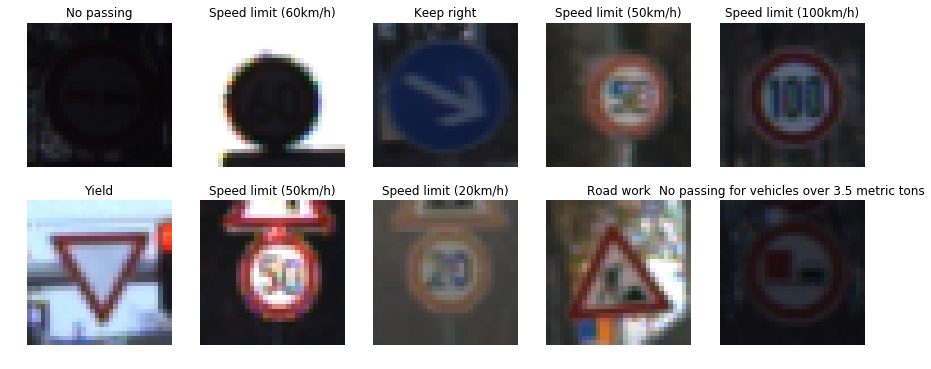

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import random
import math
# Visualizations will be shown in the notebook.
#plotting Traffic sign
%matplotlib inline
fig, axs = plt.subplots(2,5, figsize=(15, 6))
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    ind = y_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(sign_name[ind])

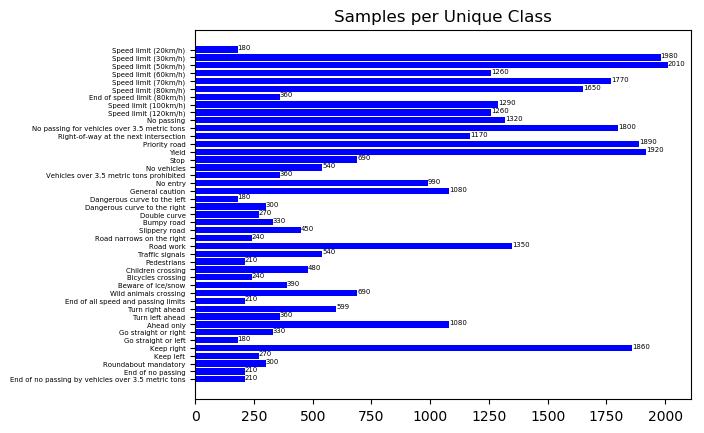

In [5]:
#plotting count of each sign.
plt.rcdefaults()
fig, ax = plt.subplots()

samples_per_class = [len(np.where(y_train==category)[0]) for category in sign_name.keys()]
classes = tuple([val for key,val in sign_name.items()])

min_count = min(samples_per_class)
max_count = max(samples_per_class)

y = np.arange(len(classes))

rects = ax.barh(y, samples_per_class, align='center', color='blue')

#labels for each bar
for i in range(0,len(rects)):
    ax.text(int(rects[i].get_width()),int(rects[i].get_y()+rects[i].get_height()/2.0),samples_per_class[i],fontproperties=fm.FontProperties(size=5))

ax.set_yticks(y)
ax.set_yticklabels(classes,fontproperties=fm.FontProperties(size=5))
ax.invert_yaxis()
ax.set_title('Samples per Unique Class')
# plt.savefig('writeup_images/each_sign_count.png')
plt.show()

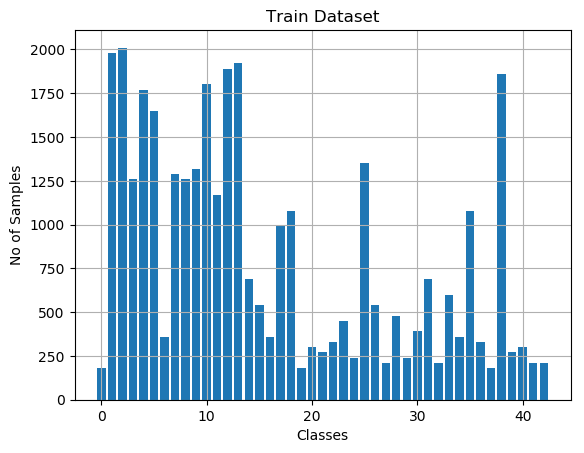

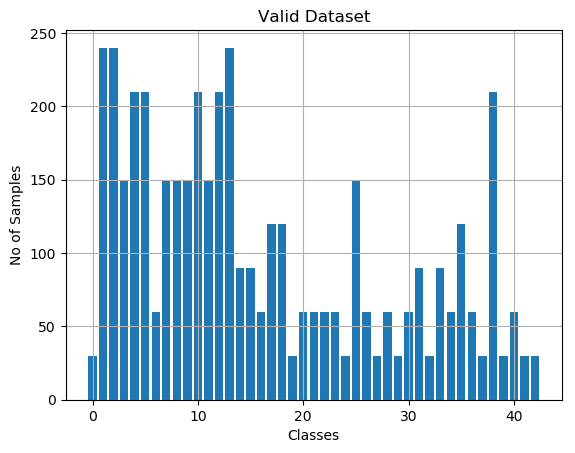

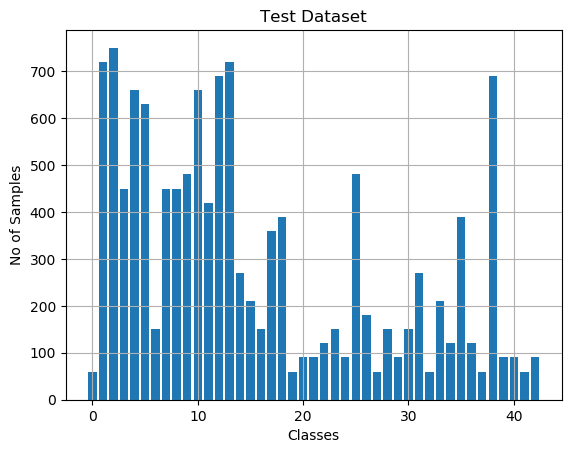

In [5]:
#Frequency of samples for each class in test,train and validation data.
unique_train, counts_train = np.unique(y_train, return_counts=True)
plt.bar(unique_train, counts_train)
plt.grid()
plt.xlabel('Classes')
plt.ylabel('No of Samples')
plt.title("Train Dataset")
# plt.savefig('writeup_images/train_sign_frequency.png')
plt.show()

unique_valid, counts_valid = np.unique(y_valid, return_counts=True)
plt.bar(unique_valid, counts_valid)
plt.grid()
plt.xlabel('Classes')
plt.ylabel('No of Samples')
plt.title("Valid Dataset")
# plt.savefig('writeup_images/valid_sign_frequency.png')
plt.show()

unique_test, counts_test = np.unique(y_test, return_counts=True)
plt.bar(unique_test, counts_test)
plt.grid()
plt.xlabel('Classes')
plt.ylabel('No of Samples')
plt.title("Test Dataset")
# plt.savefig('writeup_images/test_sign_frequency.png')
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

In [39]:
import cv2
def normalize(image):
    return cv2.normalize(image, np.zeros(image_shape[0:2]), 0, 255, cv2.NORM_MINMAX)
def rgb_to_grey(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [51]:
### Preprocessing the data. 
#Greyscaling and normalizing the images.
def preprocess_image(images): 
    prep_shape = (32, 32, 1)
    prep = np.empty(shape=(len(images),) + prep_shape, dtype=int)
    for i in range(0, len(images)):
        normalized = normalize(images[i])
        gray_image = rgb_to_grey(normalized)
        prep[i] = np.reshape(gray_image, prep_shape)
    return prep

In [52]:
prepare_X_train = preprocess_image(X_train)
prepare_X_valid = preprocess_image(X_valid)
prepare_X_test  = preprocess_image(X_test)

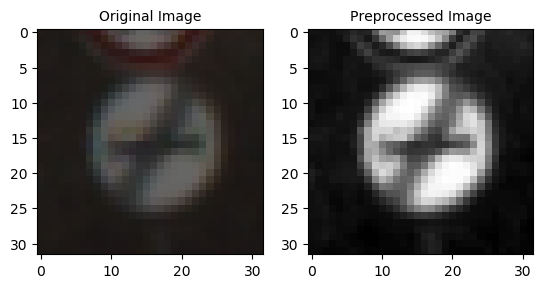

In [53]:
_, vframes = plt.subplots(nrows=1, ncols=2)
vframes[0].set_title('Original Image', fontsize=10)
vframes[0].imshow(X_train[6])
vframes[1].set_title('Preprocessed Image', fontsize=10)
vframes[1].imshow(prepare_X_train[6].squeeze(), cmap='gray')

In [43]:
from sklearn.utils import shuffle
prepare_X_train, y_train = shuffle(prepare_X_train, y_train)

In [44]:
prep_image_shape = prepare_X_train[0].shape

In [45]:
print("Image shape =", prep_image_shape)
print("Number of training samples =", len(prepare_X_train))

Image shape = (32, 32, 1)
Number of training samples = 34799


In [46]:
print(y_train[0:100])

[ 7  3  2 30 10 42  2 25 17 10  1  3  9  5  5 24 12 11 13  8 14 13 19 10 10
 13  3  8  5 34 38 29 39 10 13 13  5 12  2 39 27  4 25 30 11 10 35  2 23  7
 42  7 24 10 10 25 28 39 27 13  1  1  2 10 10 17 21  4 13  7 35  7 10 23 10
 38  1 11 10  5  5 30 17 25 18  1  5 38  8  3  9  5  2 25 38  1 38  5 12  1]


### Model Architecture

In [21]:
from tensorflow.contrib.layers import flatten
def LeNet(x,channels,classes,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, channels, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [14]:
from tensorflow.contrib.layers import flatten

def LeNet1(x,channels,classes,keep_prob):
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, channels, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #Activation.
    conv1 = tf.nn.relu(conv1)

    #Pooling. Input = 28x28x16. Output = 14x14x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #Activation.
    conv2 = tf.nn.relu(conv2)

    #Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatten. Input = 5x5x64. Output = 1600.
    fc0   = flatten(conv2)
    
    #Layer 3: Fully Connected. Input = 1600. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    #Layer 4: Fully Connected. Input = 240. Output = 84. 
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    #Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
#Features and Labels

#for input images
x = tf.placeholder(tf.float32, (None,) + prep_image_shape)

#for output labels
print('n_class: ', n_classes)
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)


n_class:  43


In [16]:
#Training pipeline
model_path = './lenet'
rate = 0.001
EPOCHS = 40
BATCH_SIZE = 64
keep_proba = 0.7

keep_prob = tf.placeholder(tf.float32)
logits = LeNet1(x,prep_image_shape[-1], n_classes, keep_proba)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [17]:
#Model Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [18]:
#Model Training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(prepare_X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        prepare_X_train, y_train = shuffle(prepare_X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = prepare_X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_proba})
            
        train_accuracy = evaluate(prepare_X_train, y_train)    
        validation_accuracy = evaluate(prepare_X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, model_path)
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.427
Validation Accuracy = 0.382

EPOCH 2 ...
Train Accuracy = 0.668
Validation Accuracy = 0.622

EPOCH 3 ...
Train Accuracy = 0.788
Validation Accuracy = 0.717

EPOCH 4 ...
Train Accuracy = 0.860
Validation Accuracy = 0.795

EPOCH 5 ...
Train Accuracy = 0.898
Validation Accuracy = 0.816

EPOCH 6 ...
Train Accuracy = 0.924
Validation Accuracy = 0.846

EPOCH 7 ...
Train Accuracy = 0.936
Validation Accuracy = 0.858

EPOCH 8 ...
Train Accuracy = 0.948
Validation Accuracy = 0.869

EPOCH 9 ...
Train Accuracy = 0.958
Validation Accuracy = 0.887

EPOCH 10 ...
Train Accuracy = 0.950
Validation Accuracy = 0.889

EPOCH 11 ...
Train Accuracy = 0.960
Validation Accuracy = 0.898

EPOCH 12 ...
Train Accuracy = 0.965
Validation Accuracy = 0.903

EPOCH 13 ...
Train Accuracy = 0.970
Validation Accuracy = 0.911

EPOCH 14 ...
Train Accuracy = 0.972
Validation Accuracy = 0.908

EPOCH 15 ...
Train Accuracy = 0.979
Validation Accuracy = 0.921

EPOCH 16 ...
Train Ac

In [19]:
with tf.Session() as sess:
    saver.restore(sess, model_path)

    test_accuracy = evaluate(prepare_X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.927


### for LeNet architecture with batch size 128 and epochs 50, the results obtained are:
    Train Accuracy = 98.6%
    Validation Accuracy = 91.8%
    Test Accuracy = 90.3%

### For deeper Lenet architecture which is Lenet2 with batch size 128 and epochs 50, the results obtained are:
    Validation Accuracy = 93.2
    Test Accuracy = 92.3
    

### After I reduced batch size 64 and epochs 40, the results obtained are: 
    Train Accuracy = 99.3%
    Validation Accuracy = 94.3%
    Test Accuracy = 92.7%
The maximum validation accuracy obtained was 95.2%

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [16]:
import os
import matplotlib.image as mpimg
import glob

images = []
labels = glob.glob("Testing_images/*.jpg")

for img in glob.glob("Testing_images/*.jpg"):
    image = mpimg.imread(img)
    images.append(image)
X_images = preprocess_image(images)
label_ids = [18, 38, 13, 14, 34]

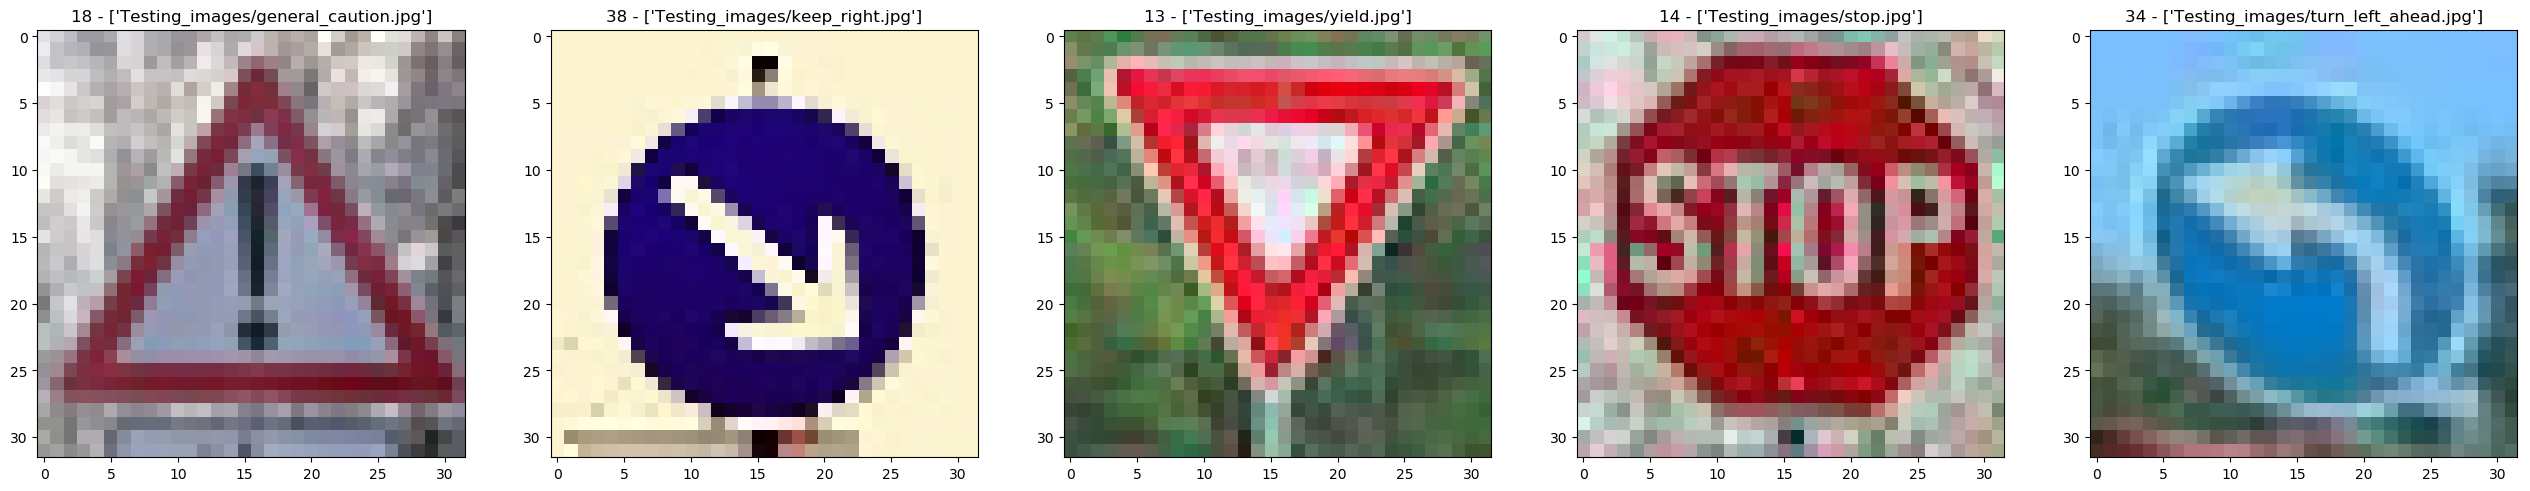

In [17]:
size = image_shape[0]
fig = plt.figure(figsize=(size,size))
for i in range(0, len(images)):
    ax = fig.add_subplot(1, len(images), i+1)
    ax.set_title(('{} - {}').format(label_ids[i],[labels[i]]))
    plt.imshow(images[i])
plt.show()

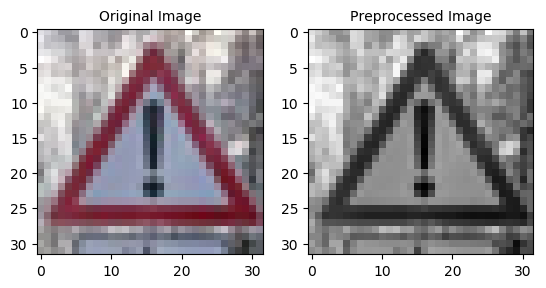

In [18]:
_, vframes = plt.subplots(nrows=1, ncols=2)
vframes[0].set_title('Original Image', fontsize=10)
vframes[0].imshow(images[0])
vframes[1].set_title('Preprocessed Image', fontsize=10)
vframes[1].imshow(X_images[0].squeeze(), cmap='gray')

### Predict the Sign Type for Each Image

In [32]:
with tf.Session() as sess:
    saver.restore(sess, model_path)
    predictions = sess.run(tf.argmax(logits, 1), feed_dict={x: X_images, y: label_ids, keep_prob: 1})
    
for i in range(len(predictions)):  
    print('Predicted:')
    print('{} : {}'.format(predictions[i], sign_name[predictions[i]]))
    print('Actual:')
    print('{} : {}'.format(label_ids[i], sign_name[label_ids[i]]))
    print()


INFO:tensorflow:Restoring parameters from ./lenet
Predicted:
18 : General caution
Actual:
18 : General caution

Predicted:
38 : Keep right
Actual:
38 : Keep right

Predicted:
13 : Yield
Actual:
13 : Yield

Predicted:
14 : Stop
Actual:
14 : Stop

Predicted:
34 : Turn left ahead
Actual:
34 : Turn left ahead



### Analyze Performance

In [33]:
with tf.Session() as sess:
    saver.restore(sess, model_path)
    image_accuracy = evaluate(X_images, label_ids)
    print("Accuracy = {:.3f}".format(image_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [34]:
k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, model_path)
    image_softmax_logits = sess.run(softmax_logits, feed_dict={x: X_images, keep_prob: 1.0})
    images_top_k = sess.run(top_k, feed_dict={x: X_images, keep_prob: 1.0})
for i in range(len(images_top_k[0])):
    print('Image: ' + labels[i])
    print('Probabilities:')
    for j in range(0, len(images_top_k[0][i])):
        probabilities = images_top_k[0][i][j]
        index = images_top_k[1][i][j]
        name = sign_name[index]
        print('   {:.6f} : {} - {}'.format(probabilities, index, name))
    print()

INFO:tensorflow:Restoring parameters from ./lenet
Image: Testing_images/general_caution.jpg
Probabilities:
   1.000000 : 18 - General caution
   0.000000 : 0 - Speed limit (20km/h)
   0.000000 : 1 - Speed limit (30km/h)
   0.000000 : 2 - Speed limit (50km/h)
   0.000000 : 3 - Speed limit (60km/h)

Image: Testing_images/keep_right.jpg
Probabilities:
   1.000000 : 38 - Keep right
   0.000000 : 0 - Speed limit (20km/h)
   0.000000 : 1 - Speed limit (30km/h)
   0.000000 : 2 - Speed limit (50km/h)
   0.000000 : 3 - Speed limit (60km/h)

Image: Testing_images/yield.jpg
Probabilities:
   0.263068 : 38 - Keep right
   0.238169 : 8 - Speed limit (120km/h)
   0.208536 : 26 - Traffic signals
   0.114854 : 13 - Yield
   0.096622 : 34 - Turn left ahead

Image: Testing_images/stop.jpg
Probabilities:
   0.999889 : 14 - Stop
   0.000101 : 13 - Yield
   0.000004 : 15 - No vehicles
   0.000003 : 1 - Speed limit (30km/h)
   0.000003 : 8 - Speed limit (120km/h)

Image: Testing_images/turn_left_ahead.jpg
P

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [111]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    if featuremaps > 48:
        featuremaps = 48
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")